# Random forest results figures
* Cross-validation
* Performance
* Feature selection

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

envs = ["YPACETATE", "YPD14", "YPD40", "YPD42", "YPD6AU", "YPDANISO10", 
"YPDANISO20", "YPDANISO50", "YPDBENOMYL200", "YPDBENOMYL500", "YPDCAFEIN40", 
"YPDCAFEIN50", "YPDCHX05", "YPDCHX1", "YPDCUSO410MM", "YPDDMSO", "YPDETOH", 
"YPDFLUCONAZOLE", "YPDFORMAMIDE4", "YPDFORMAMIDE5", "YPDHU", "YPDKCL2M", 
"YPDLICL250MM", "YPDMV", "YPDNACL15M", "YPDNACL1M", "YPDNYSTATIN", "YPDSDS", 
"YPDSODIUMMETAARSENITE", "YPETHANOL", "YPGALACTOSE", "YPRIBOSE", "YPGLYCEROL", 
"YPXYLOSE", "YPSORBITOL"]

# Growth Conditions and Descriptions
# growth temperature is 30C if not specified
cond = {"YPDKCL2M":"YPD KCL 2M", "YPGALACTOSE":"YP Galactose 2%", "YPD40":"YPD 40C", 
"YPDCHX05":"YPD Cycloheximide 0.5µg/ml", "YPDLICL250MM":"YPD LiCl 250mM", 
"YPGLYCEROL":"YP Glycerol 2%", "YPD42":"YPD 42C", "YPDCHX1":"YPD Cycloheximide 1µg/ml", 
"YPDMV":"YPD Methylviologen 20mM", "YPRIBOSE":"YP Ribose 2%", "YPD6AU":"YPD 6-Azauracile 600µg/ml", 
"YPDCUSO410MM":"YPD CuSO4 10mM", "YPDNACL15M":"YPD NaCl 1.5M", "YPSORBITOL":"YP Sorbitol 2%", 
"YPDANISO10":"YPD Anisomycin 10µg/ml", "YPDNACL1M":"YPD NaCl 1M", "YPXYLOSE":"YP Xylose 2%", 
"YPDANISO20":"YPD Anisomycin 20µg/ml", "YPDETOH":"YPD Ethanol 15%", "YPDSDS":"YPD SDS 0.2%", 
"YPDSODIUMMETAARSENITE":"YPD Sodium metaarsenite 2.5mM", "YPDNYSTATIN":"YPD Nystatin 10µg/ml", 
"YPDFLUCONAZOLE":"YPD Fluconazole 20µg/ml", "YPACETATE":"YP Acetate 2%", "YPDCAFEIN40":"YPD Caffeine 40mM", 
"YPDHU":"YPD Hydroxyurea 30mg/ml", "YPETHANOL":"YP Ethanol 2%", "YPD14":"YPD 14C", 
"YPDCAFEIN50":"YPD Caffeine 50mM", "YPDDMSO":"YPD DMSO 6%", "YPDANISO50":"YPD Anisomycin 50µg/ml", 
"YPDBENOMYL200":"YPD Benomyl 200µg/ml", "YPDFORMAMIDE4":"YPD Formamide 4%", 
"YPDBENOMYL500":"YPD Benomyl 500µg/ml", "YPDFORMAMIDE5":"YPD Formamide 5%"}

# Directory containing rrBLUP results data
os.chdir("/mnt/home/seguraab/Shiu_Lab/Project/yeast_RF_results/SNPs_as_Features")


# Directory to save figures & data
dir = "/mnt/home/seguraab/Shiu_Lab/Project/Scripts/Genomic_Prediction_RF/Figures"
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Results"

os.getcwd()

'/mnt/ufs18/home-056/seguraab/Shiu_Lab/Project/yeast_RF_results/SNPs_as_Features'

In [2]:
results = pd.read_csv("RESULTS_reg.txt", sep="\t")
results.ID = results.ID.str.rstrip("_rf_baseline")
results = results.replace({"ID":cond}) # remap condition names
results[["ID","r2_test", "r2_val", "PCC_test", "PCC_val"]].to_csv("%s/RF_average_R2_.csv"%dir2)
results.head()

,DateTime,RunTime,ID,Tag,Y,Alg,NumInstances,FeatureNum,CVfold,CV_rep,...,MSE_test_se,EVS_test,EVS_test_sd,EVS_test_se,r2_test,r2_test_sd,r2_test_se,PCC_test,PCC_test_sd,PCC_test_se
0,2021-09-01 21:36:58,63661.016016,YP Ribose 2%,NaN,Y,RF,625,64456,5,100,...,0.000007,0.193323,0.004128,0.000413,0.190937,0.004143,0.000414,0.440448,0.004441,0.000444
1,2021-09-01 23:29:25,73176.454359,YPD 42C,NaN,Y,RF,625,64456,5,100,...,0.000018,0.303254,0.004334,0.000433,0.303068,0.004311,0.000431,0.554624,0.003383,0.000338
2,2021-09-02 00:36:57,64326.089691,YPD Ethanol 15%,NaN,Y,RF,625,64456,5,100,...,0.000003,0.167626,0.003169,0.000317,0.167117,0.003195,0.000320,0.425474,0.004873,0.000487
3,2021-09-02 00:39:42,56811.200821,YP Ethanol 2%,NaN,Y,RF,625,64456,5,100,...,0.000031,0.174353,0.009553,0.000955,0.171190,0.009450,0.000945,0.433268,0.015114,0.001511
4,2021-09-02 01:18:23,62034.639055,YPD Nystatin 10µg/ml,NaN,Y,RF,625,64456,5,100,...,0.000002,0.116238,0.001970,0.000197,0.114899,0.001991,0.000199,0.435790,0.005561,0.000556


## Average performance R-sq for each context-specific model

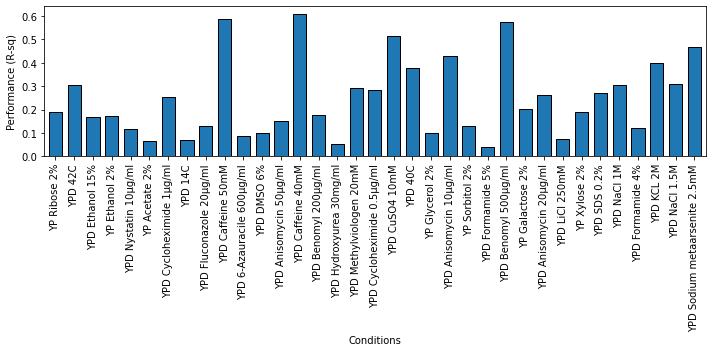

In [4]:
dir='/mnt/home/seguraab/Shiu_Lab/Project/Scripts/Genomic_Prediction_RF'
results.plot(kind="bar", x="ID", y="r2_test", width=0.7, edgecolor="black", figsize=(10,5), xlabel="Conditions", ylabel="Performance (R-sq)", legend=False)
plt.tight_layout()
plt.savefig("%s/RF_average_test_R2_v_Conditions_barplot.pdf"%dir)

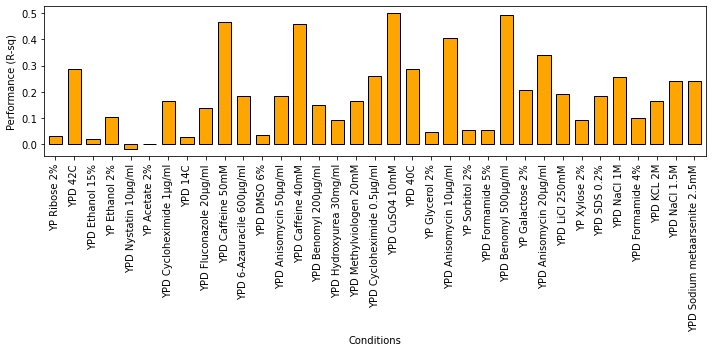

In [ ]:
results.plot(kind="bar", x="ID", y="r2_val", color="orange", width=0.7, edgecolor="black", figsize=(10,5), xlabel="Conditions", ylabel="Performance (R-sq)", legend=False)
plt.tight_layout()
plt.savefig("%s/RF_average_cv_R2_v_Conditions_barplot.pdf"%dir)